# USA Performance Prediction in Olympic Games 2024

## By - Thamizhanbu
## Codedex - https://www.codedex.io/@dannush65219

In [1]:
import pandas as pd

In [3]:
historic_county_ranking = pd.read_csv("Olympic_Games_Medal_Tally.csv")

In [4]:
historic_county_ranking.head()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


In [5]:
summer_olympics_result = historic_county_ranking[historic_county_ranking['edition'].str.contains('Summer')]

In [6]:
usa_data = summer_olympics_result[summer_olympics_result['country_noc'] == 'USA']

In [7]:
usa_data.reset_index(drop=True, inplace=True)


## Medal Count Trend of USA in Olympics from 1896 to 2020

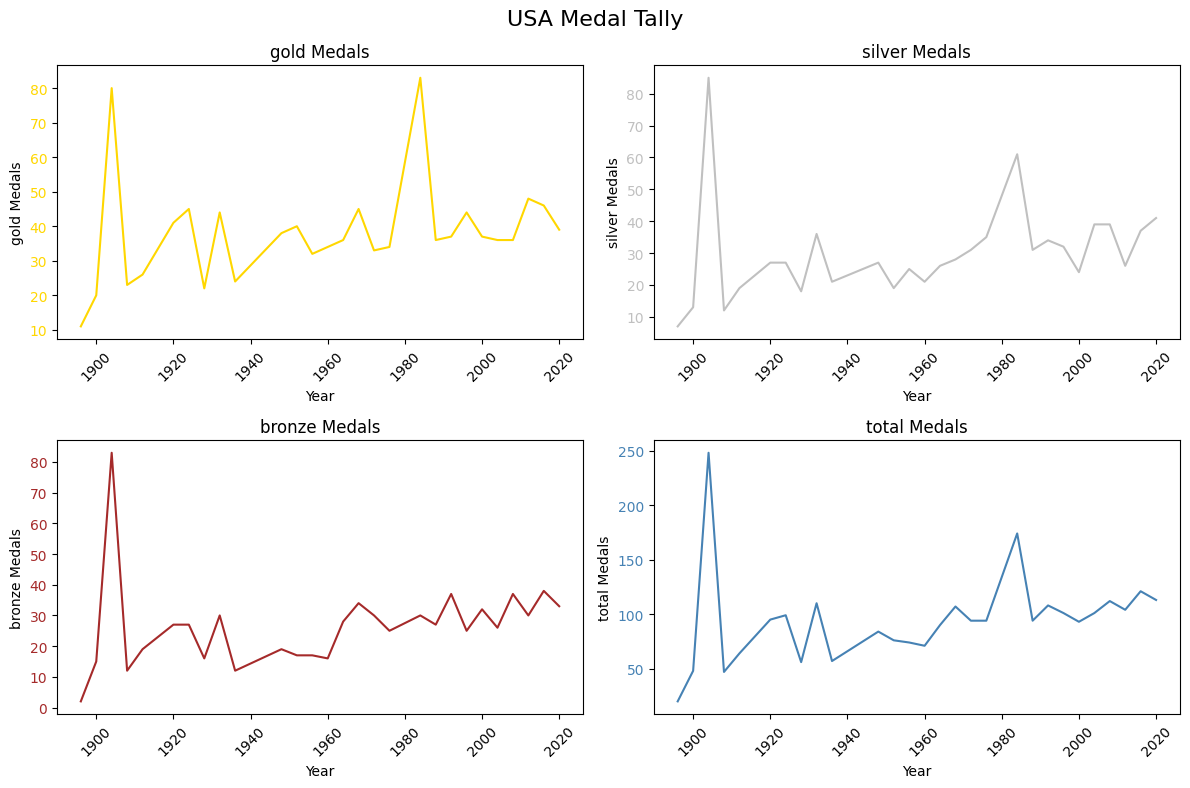

In [8]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Set a custom color palette
colors = ['gold', 'silver', 'brown', 'steelblue']

# Set the heading for the collage
fig.suptitle('USA Medal Tally', fontsize=16)

# Beautify each subplot
for i, ax in enumerate(axes.flat):
    # Set the color for each subplot
    ax.plot(usa_data['year'], usa_data.iloc[:, i+5], color=colors[i])
    
    # Set the title for each subplot
    ax.set_title(usa_data.columns[i+5] + ' Medals')
    
    # Set the x-axis label for each subplot
    ax.set_xlabel('Year')
    
    # Set the y-axis label for each subplot
    ax.set_ylabel(usa_data.columns[i+5] + ' Medals')
    
    # Customize the tick labels
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelcolor=colors[i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the collage
plt.show()


## Average Medal Count of USA

In [9]:
print("Average Total Medals USA gets = ",round(usa_data['total'].mean(),0))
print("Average Gold Medals USA gets = ",round(usa_data['gold'].mean(),0))
print("Average Silver Medals USA gets = ",round(usa_data['silver'].mean(),0))
print("Average Bronze Medals USA gets = ",round(usa_data['bronze'].mean(),0))

Average Total Medals USA gets =  95.0
Average Gold Medals USA gets =  38.0
Average Silver Medals USA gets =  30.0
Average Bronze Medals USA gets =  27.0


## 2024 Prediction

### Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

def linear_reg (cat):
    X_train,X_test,y_train,y_test = train_test_split(usa_data['year'],usa_data[cat],test_size=0.2,random_state=42)
    model = LinearRegression()
    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R-squared:", r2_score(y_test, y_pred))
    year = 2024
    predicted_val = model.predict([[year]])
    print(f"The predicted {cat} medals for the year {year} is {round(predicted_val[0],0)}\n")

cat = ['gold','silver','bronze','total']
for i in cat:
    linear_reg(i)

R-squared: 0.0342742989216811
The predicted gold medals for the year 2024 is 42.0

R-squared: -0.21394980770943683
The predicted silver medals for the year 2024 is 37.0

R-squared: -0.5641580646428308
The predicted bronze medals for the year 2024 is 31.0

R-squared: -0.15797531588510094
The predicted total medals for the year 2024 is 110.0



### Support Vector Regression Model

In [11]:
from sklearn.svm import SVR

def pred_svr(cat):
    X_train,X_test,y_train,y_test = train_test_split(usa_data['year'],usa_data[cat],test_size=0.2,random_state=42)
    model = SVR(kernel="linear")
    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R-squared:", r2_score(y_test, y_pred))
    year = 2024
    predicted_val = model.predict([[year]])
    print(f"The predicted {cat} medals for the year {year} is {round(predicted_val[0],0)}\n")

cat = ['gold','silver','bronze','total']
for i in cat:
    pred_svr(i)

R-squared: 0.334305394397159
The predicted gold medals for the year 2024 is 39.0

R-squared: 0.18284906771044118
The predicted silver medals for the year 2024 is 40.0

R-squared: 0.1671367063156023
The predicted bronze medals for the year 2024 is 36.0

R-squared: 0.4672406042317442
The predicted total medals for the year 2024 is 120.0



### Neural Network Model

In [12]:
from sklearn.neural_network import MLPRegressor

def pred_neuralnetwork (cat):
    X_train,X_test,y_train,y_test = train_test_split(usa_data['year'],usa_data[cat],test_size=0.2,random_state=42)
    model = MLPRegressor(learning_rate='adaptive',max_iter=1000)
    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R-squared:", r2_score(y_test, y_pred))
    year = 2024
    predicted_val = model.predict([[year]])
    print(f"The predicted {cat} medals for the year {year} is {round(predicted_val[0],0)}\n")

cat = ['gold','silver','bronze','total']
for i in cat:
    pred_neuralnetwork(i)

R-squared: -10.410105774990507
The predicted gold medals for the year 2024 is 79.0

R-squared: -34.7117895578784
The predicted silver medals for the year 2024 is -31.0

R-squared: -50.77615515346039
The predicted bronze medals for the year 2024 is 95.0

R-squared: -6.2487871737116585
The predicted total medals for the year 2024 is 163.0



## Conclusion

- We can conclude telling that USA will win 100+ medals in 2024 Olympics.
- With the help of the models we can predict the medal count of USA in 2024 Olympics.
- The prediction is based on the past data of USA in Olympics from 1896 to 2020.
- Support Vector Regression Model was shown best performance for predicting the medal count of USA in 2024 Olympics which gave output of 120 medals.
- Still the medal count may vary based on the performance of the athletes in the Olympics.